In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Merge Data 

(Only run once)

In [ ]:
har_df = pd.read_csv("extracted_data/har_data.csv")
light_df = pd.read_csv("extracted_data/lighthouse_summary.csv")
har_df = har_df.drop(["Unnamed: 0"], axis=1).rename({"site":"url"}, axis=1)

merged = pd.merge(light_df, har_df, on="url", how="inner")
scores = pd.read_csv("extracted_data/carbon_scores.csv")
merged = pd.merge(merged, scores, on="url", how="inner")
merged = merged.drop(["dom_size"], axis=1)

merged.to_csv("lighthouse_data.csv")
merged.head()


,url,total_bytes_x,total_mb,requests,third_party_bytes,third_party_mb,fcp_ms,lcp_ms,tbt_ms,speed_index,...,js_count,css_count,img_count,font_count,html_count,other_count,dom_size,total_bytes_y,cacheable_bytes,cacheability_ratio
0,https://www.nytimes.com/,59584450,56.824160,207,56506186,53.888498,974.72965,7239.45725,2202.500000,2984.821435,...,61,14,48,12,5,403,NaN,32697659,30566555,0.934824
1,https://www.tiktok.com/explore,17000694,16.213125,334,10947407,10.440261,2088.78840,2800.82872,603.597280,3748.915479,...,181,6,42,6,1,751,NaN,29264705,28730384,0.981742
2,https://mail.ru/,16884428,16.102245,352,16364025,15.605950,4232.88151,7903.16250,796.035145,12503.402164,...,50,9,132,11,7,689,NaN,17260713,16418701,0.951218
3,https://www.bloomberg.com/,15700182,14.972860,600,14702606,14.021498,924.30070,1169.40100,2655.978450,3241.476010,...,161,41,139,21,11,1276,NaN,50491458,38735354,0.767166
4,https://www.gumtree.com/,11153121,10.636445,614,5183598,4.943464,966.86370,10752.79625,736.000000,6471.616148,...,141,7,164,10,48,1445,NaN,17524402,16850737,0.961558


# Load Data

In [5]:
df = pd.read_csv("./lighthouse_data.csv")
df = df.drop(["Unnamed: 0"], axis=1).dropna()
df.head()

,url,total_bytes,total_mb,requests,third_party_bytes,third_party_mb,fcp_ms,lcp_ms,tbt_ms,speed_index,...,js_count,css_count,img_count,font_count,html_count,other_count,total_bytes_y,cacheable_bytes,cacheability_ratio,co2_g
0,https://www.nytimes.com/,59584450,56.824160,207,56506186,53.888498,974.72965,7239.45725,2202.500000,2984.821435,...,61,14,48,12,5,403,32697659,30566555,0.934824,1.27
1,https://www.tiktok.com/explore,17000694,16.213125,334,10947407,10.440261,2088.78840,2800.82872,603.597280,3748.915479,...,181,6,42,6,1,751,29264705,28730384,0.981742,0.69
2,https://mail.ru/,16884428,16.102245,352,16364025,15.605950,4232.88151,7903.16250,796.035145,12503.402164,...,50,9,132,11,7,689,17260713,16418701,0.951218,2.12
3,https://www.bloomberg.com/,15700182,14.972860,600,14702606,14.021498,924.30070,1169.40100,2655.978450,3241.476010,...,161,41,139,21,11,1276,50491458,38735354,0.767166,2.09
4,https://www.gumtree.com/,11153121,10.636445,614,5183598,4.943464,966.86370,10752.79625,736.000000,6471.616148,...,141,7,164,10,48,1445,17524402,16850737,0.961558,0.71


In [6]:
df["js_frac"] = df["js_bytes"] / df["total_bytes"]
df["img_frac"] = df["img_bytes"] / df["total_bytes"]
df["css_frac"] = df["css_bytes"] / df["total_bytes"]
df["font_frac"] = df["font_bytes"] / df["total_bytes"]

df['log_total_mb'] = np.log1p(df['total_mb'].fillna(0))
df['log_co2'] = np.log1p(df['co2_g'].fillna(0))
df['log_requests'] = np.log1p(df['requests'].fillna(0))
df['log_tbt'] = np.log1p(df['tbt_ms'].fillna(0))

# Correlation Exploration

In [29]:
df[[col for col in df.columns if col != "url"]].corr()['tbt_ms']

total_bytes           0.597758
total_mb              0.597758
requests              0.455084
third_party_bytes     0.569535
third_party_mb        0.569535
fcp_ms                0.178870
lcp_ms                0.480085
tbt_ms                1.000000
speed_index           0.383134
cls                   0.000079
js_bytes              0.655946
css_bytes             0.222455
img_bytes             0.324413
font_bytes            0.121533
html_bytes            0.431572
other_bytes           0.563209
js_count              0.497684
css_count             0.562234
img_count             0.166731
font_count            0.121498
html_count            0.247697
other_count           0.438538
total_bytes_y         0.779667
cacheable_bytes       0.737587
cacheability_ratio   -0.234501
co2_g                 0.523682
js_frac               0.077078
img_frac             -0.144910
css_frac             -0.131855
font_frac            -0.147264
log_total_mb          0.614430
log_co2               0.515683
Name: tb

Third party MB is heavily correlated with total MB which is expected. When performing statistical analyses we will have to include one or the other. </br> 

No one variable is particularly correlated with emissions. Each is at about .25-.3 $R^2$, but let's hope it's not all the same 30% of the variation.

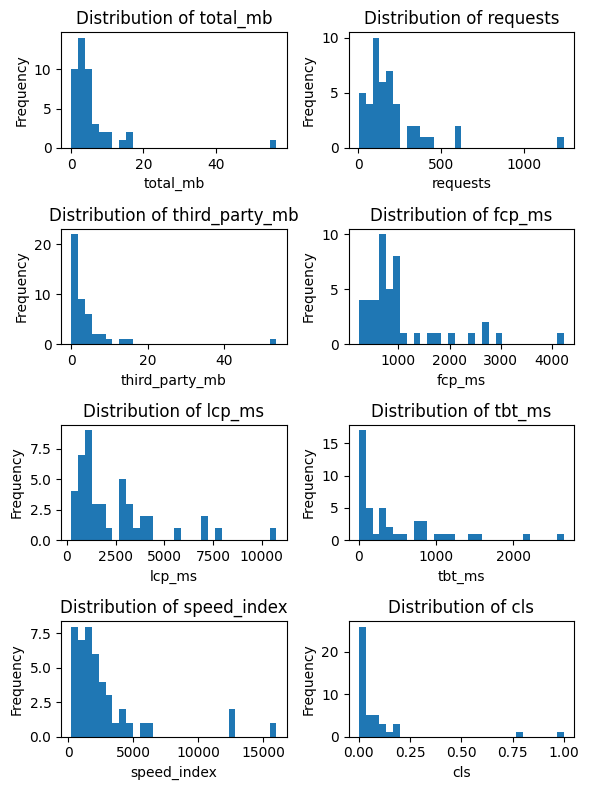

In [7]:
preds = ['total_mb', 'requests', 'third_party_mb', 'fcp_ms',
        'lcp_ms', 'tbt_ms', 'speed_index', 'cls']

fig, axes = plt.subplots(4, 2, figsize=(6, 8))
axes = axes.flatten()

for ax, col in zip(axes, preds):
    ax.hist(df[col].dropna(), bins=30)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


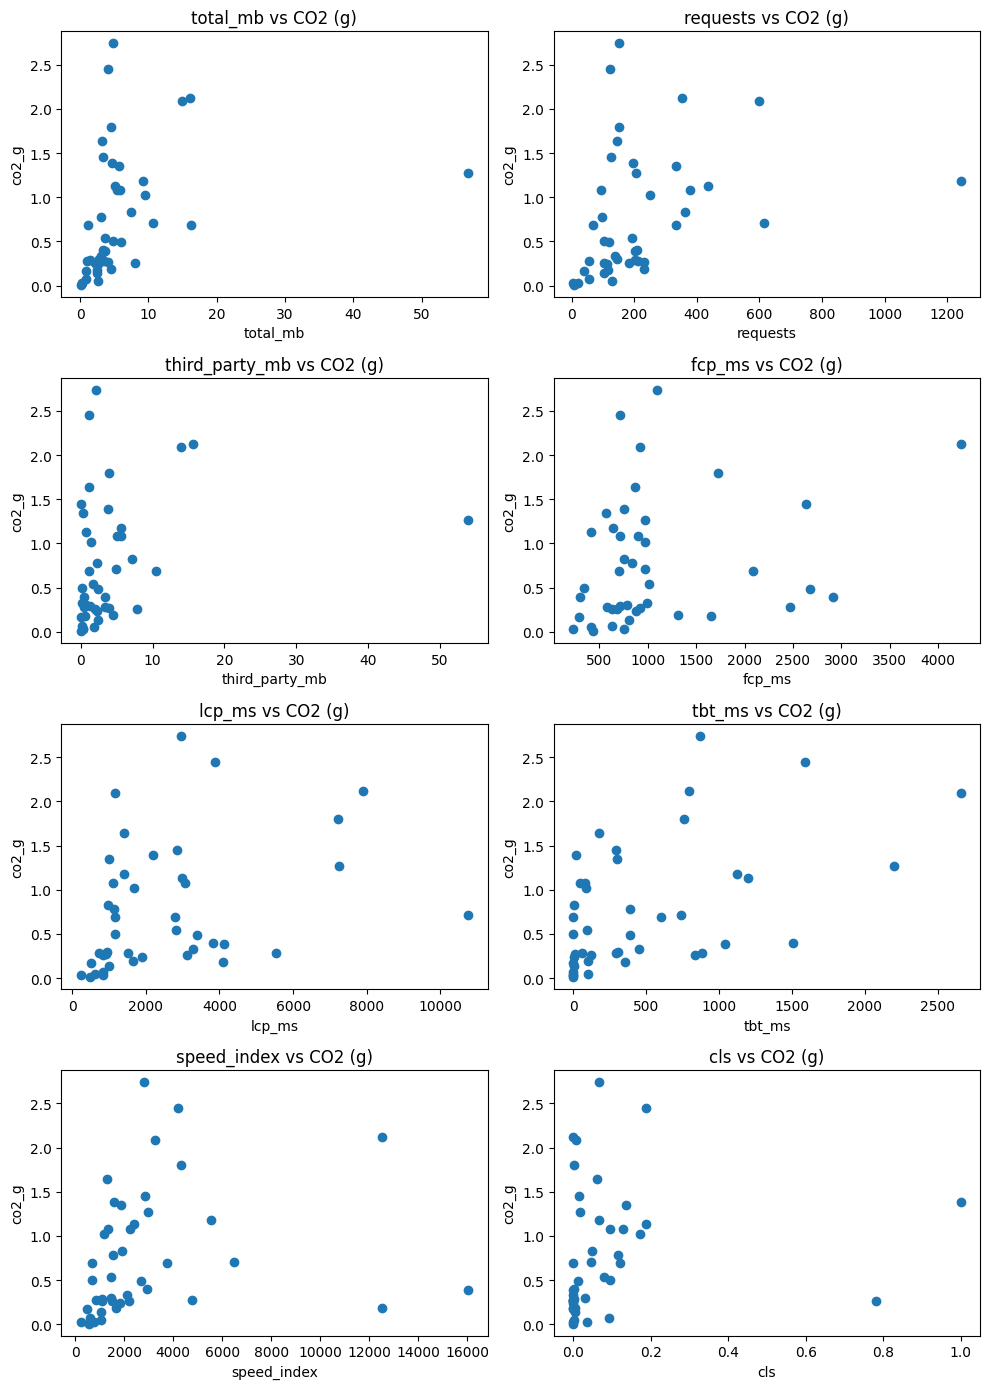

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(10, 14))
axes = axes.flatten()

for ax, col in zip(axes, preds):
    ax.scatter(df[col], df['co2_g'])
    ax.set_title(f"{col} vs CO2 (g)")
    ax.set_xlabel(col)
    ax.set_ylabel("co2_g")

plt.tight_layout()
plt.show()


Log-log of Requests and TBT vs CO2

In [13]:
from scipy.stats import linregress

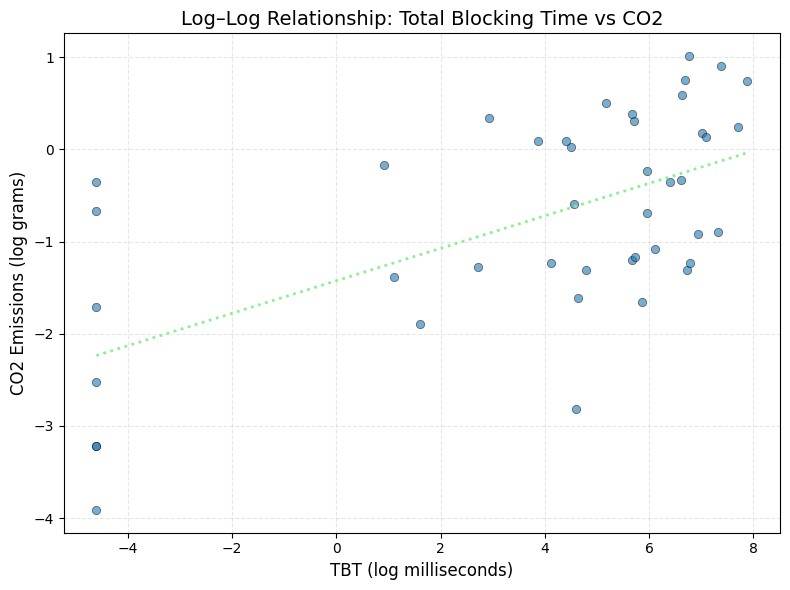

In [20]:
x = np.log(df['tbt_ms']+.01)
y = np.log(df['co2_g']+.01)

slope, intercept, r, p, stderr = linregress(x, y)
line_x = np.linspace(x.min(), x.max(), 200)
line_y = intercept + slope * line_x

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, edgecolor='k', linewidth=0.5)
plt.plot(line_x, line_y, color="lightgreen", linewidth=2, linestyle=":")
# Confidence band (approximate)
# y_pred = intercept + slope * x
# residuals = y - y_pred
# sigma = residuals.std()
# plt.fill_between(
#     line_x,
#     line_y - 1.96 * sigma,
#     line_y + 1.96 * sigma,
#     color = "lightgreen",
#     alpha=0.15
# )

plt.xlabel("TBT (log milliseconds)", fontsize=12)
plt.ylabel("CO2 Emissions (log grams)", fontsize=12)
plt.title("Log–Log Relationship: Total Blocking Time vs CO2", fontsize=14)

plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.savefig("tbt_vs_co2.png", dpi=200)
plt.show()

# Regression

### Regular OLS on ['total_mb', 'requests', 'fcp_ms', 'lcp_ms', 'tbt_ms', 'speed_index', 'cls'] vs co2_g

In [24]:
import statsmodels.api as sm
X = sm.add_constant(df[[c for c in preds if c != "third_party_mb"]])
model = sm.OLS(df["co2_g"],X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  co2_g   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     2.847
Date:                Mon, 17 Nov 2025   Prob (F-statistic):             0.0185
Time:                        16:09:48   Log-Likelihood:                -35.789
No. Observations:                  43   AIC:                             87.58
Df Residuals:                      35   BIC:                             101.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1576      0.196      0.803      0.427      -0.241       0.556
total_mb       -0.0067      0.014     -0.467      0.643      -0.036       0.023
requests        0.0005      0.001      1.012      0.318      -0.001       0.002
fcp_ms          0.0003      0.000      1.725      0.093   -5.31e-05       0.001
lcp_ms       2.862e-05   6.03e-05      0.475      0.638   -9.38e-05       0.000
tbt_ms          0.0006      0.000      2.603      0.013       0.000       0.001
speed_index -6.083e-05   4.68e-05     -1.300      0.202      -0.000    3.42e-05
cls             0.6648      0.508      1.308      0.199      -0.367       1.697
==============================================================================
Omnibus:                        7.973   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                6.947
Skew:                           0.802   Prob(JB):                       0.0310
Kurtosis:                       4.142   Cond. No.                     2.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Scaled Variables

In [36]:
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import StandardScaler

In [38]:
preds = ['total_mb', 'requests', 'fcp_ms', 'lcp_ms', 'tbt_ms', 'cls']
scaler = StandardScaler()
X = scaler.fit_transform(df[preds])
y = scaler.fit_transform(df[['co2_g']])

In [39]:
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.332
Model:                            OLS   Adj. R-squared (uncentered):              0.224
Method:                 Least Squares   F-statistic:                              3.065
Date:                Mon, 17 Nov 2025   Prob (F-statistic):                      0.0155
Time:                        16:22:34   Log-Likelihood:                         -52.339
No. Observations:                  43   AIC:                                      116.7
Df Residuals:                      37   BIC:                                      127.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0193      0.173     -0.111      0.912      -0.370       0.332
x2             0.1094      0.150      0.730      0.470      -0.194       0.413
x3             0.1931      0.162      1.189      0.242      -0.136       0.522
x4             0.0165      0.185      0.089      0.929      -0.358       0.391
x5             0.4364      0.185      2.361      0.024       0.062       0.811
x6             0.1857      0.137      1.360      0.182      -0.091       0.463
==============================================================================
Omnibus:                        7.881   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                6.743
Skew:                           0.833   Prob(JB):                       0.0343
Kurtosis:                       3.993   Cond. No.                         2.62
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tells us that requests, tbt_ms, and cls are likely the most important.

In [54]:
preds = ['requests', 'tbt_ms', 'cls']
scaler = StandardScaler()
X = scaler.fit_transform(df[preds])
y = df["co2_g"]

In [55]:
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  co2_g   R-squared (uncentered):                   0.132
Model:                            OLS   Adj. R-squared (uncentered):              0.067
Method:                 Least Squares   F-statistic:                              2.027
Date:                Mon, 17 Nov 2025   Prob (F-statistic):                       0.125
Time:                        16:40:02   Log-Likelihood:                         -59.651
No. Observations:                  43   AIC:                                      125.3
Df Residuals:                      40   BIC:                                      130.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0739      0.171      0.433      0.667      -0.271       0.419
x2             0.3239      0.171      1.898      0.065      -0.021       0.669
x3             0.1088      0.153      0.710      0.482      -0.201       0.419
==============================================================================
Omnibus:                        9.115   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.212
Skew:                           0.998   Prob(JB):                       0.0165
Kurtosis:                       3.774   Cond. No.                         1.61
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log Log

In [56]:
model = smf.ols("np.log1p(co2_g) ~ np.log1p(requests) + np.log1p(tbt_ms)", data=df).fit()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log1p(co2_g)   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     9.144
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           0.000537
Time:                        16:42:02   Log-Likelihood:                -8.9530
No. Observations:                  43   AIC:                             23.91
Df Residuals:                      40   BIC:                             29.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2376      0.262     -0.908      0.369      -0.766       0.291
np.log1p(requests)     0.1081      0.064      1.692      0.098      -0.021       0.237
np.log1p(tbt_ms)       0.0447      0.025      1.803      0.079      -0.005       0.095
==============================================================================
Omnibus:                        2.846   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.439
Skew:                           0.475   Prob(JB):                        0.295
Kurtosis:                       2.323   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Final Presentation Exploration

Distribution of Cacheability Ratio and Total Page Size

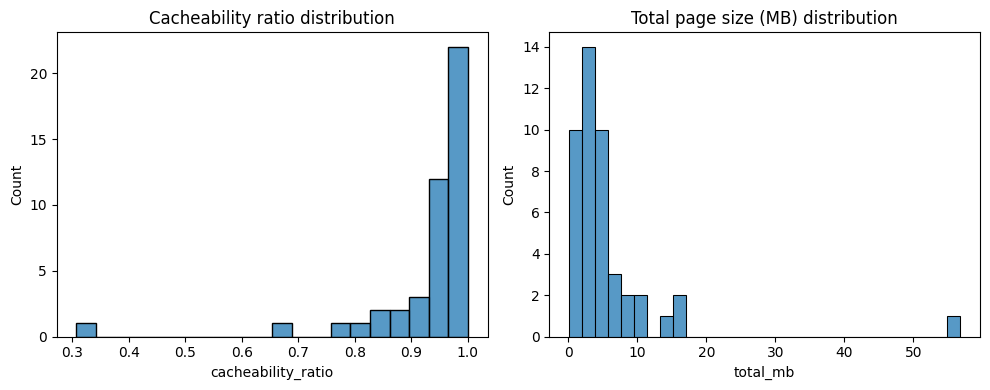

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['cacheability_ratio'].dropna(), bins=20)
plt.title('Cacheability ratio distribution')
plt.xlabel('cacheability_ratio')

plt.subplot(1,2,2)
sns.histplot(df['total_mb'].dropna(), bins=30)
plt.title('Total page size (MB) distribution')
plt.xlabel('total_mb')
plt.tight_layout()
plt.show()

Log–log scatter: total_mb vs co2_g

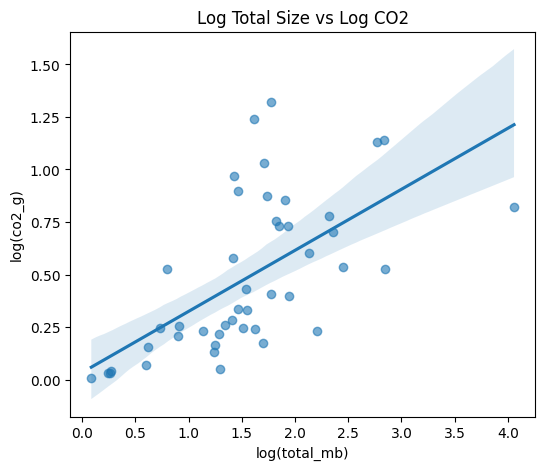

In [7]:
plt.figure(figsize=(6,5))
sns.regplot(x='log_total_mb', y='log_co2', data=df, scatter_kws={'alpha':0.6})
plt.xlabel('log(total_mb)')
plt.ylabel('log(co2_g)')
plt.title('Log Total Size vs Log CO2')
plt.show()

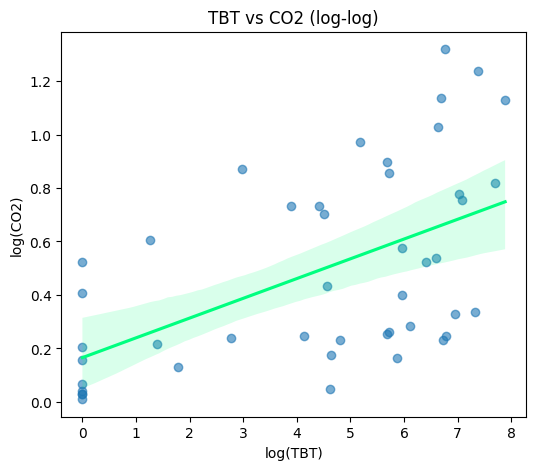

In [9]:
plt.figure(figsize=(6,5))
sns.regplot(x='log_tbt', y='log_co2', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'springgreen'})
plt.xlabel('log(TBT)')
plt.ylabel('log(CO2)')
plt.title('TBT vs CO2 (log-log)')
plt.show()

Mechanism Analysis --- Analyze log_tbt vs structural variables

In [8]:
df.columns

Index(['url', 'total_bytes', 'total_mb', 'requests', 'third_party_bytes',
       'third_party_mb', 'fcp_ms', 'lcp_ms', 'tbt_ms', 'speed_index', 'cls',
       'js_bytes', 'css_bytes', 'img_bytes', 'font_bytes', 'html_bytes',
       'other_bytes', 'js_count', 'css_count', 'img_count', 'font_count',
       'html_count', 'other_count', 'total_bytes_y', 'cacheable_bytes',
       'cacheability_ratio', 'co2_g', 'js_frac', 'img_frac', 'css_frac',
       'font_frac', 'log_total_mb', 'log_co2', 'log_requests', 'log_tbt'],
      dtype='object')

In [1]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [9]:
model_tbt = smf.ols("log_tbt ~ np.log1p(js_bytes) + np.log1p(img_bytes) + np.log1p(css_bytes) + \
                     np.log1p(total_bytes) + cacheability_ratio + js_count",
                     data=df).fit()
print(model_tbt.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tbt   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     15.72
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           5.61e-09
Time:                        22:12:28   Log-Likelihood:                -79.865
No. Observations:                  45   AIC:                             173.7
Df Residuals:                      38   BIC:                             186.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -18.06

In [10]:
print(model_tbt.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}         &     log\_tbt     & \textbf{  R-squared:         } &     0.713   \\
\textbf{Model:}                 &       OLS        & \textbf{  Adj. R-squared:    } &     0.668   \\
\textbf{Method:}                &  Least Squares   & \textbf{  F-statistic:       } &     15.72   \\
\textbf{Date:}                  & Thu, 11 Dec 2025 & \textbf{  Prob (F-statistic):} &  5.61e-09   \\
\textbf{Time:}                  &     22:13:01     & \textbf{  Log-Likelihood:    } &   -79.865   \\
\textbf{No. Observations:}      &          45      & \textbf{  AIC:               } &     173.7   \\
\textbf{Df Residuals:}          &          38      & \textbf{  BIC:               } &     186.4   \\
\textbf{Df Model:}              &           6      & \textbf{                     } &             \\
\textbf{Covariance Type:}       &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcc

β ≈ %CO₂ change for 1% bytes change.

**Interpretation**:

`js_bytes` is the only significant variable (aside from the intercept). These variables represent elasticities since we used the log. A 10% increase in the number of javascript bytes would yield a 1.346\*10 = 13.46% increase in the `log_tbt` or .1346 ms increase. JS is large and significant so we can say that JS has a large impact on the tbt_ms. `img_bytes` does not have a big impact which makes the network vs CPU separation clear. `cacheability_ratio` is large and negative but not significant. In general, increasing the number of bytes that are cacheable seems to decrease blocking time, but we don't have significant enough evidence to claim this will always be the case.

### Main Model to Report On

In [11]:
model_co2 = smf.ols("log_co2 ~ np.log1p(total_bytes) + cacheability_ratio + js_frac + img_frac + np.log1p(requests)",
                    data=df).fit()
print(model_co2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_co2   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     5.332
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           0.000792
Time:                        22:14:31   Log-Likelihood:                -6.2448
No. Observations:                  45   AIC:                             24.49
Df Residuals:                      39   BIC:                             35.33
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.00

In [12]:
print(model_co2.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}         &     log\_co2     & \textbf{  R-squared:         } &     0.406   \\
\textbf{Model:}                 &       OLS        & \textbf{  Adj. R-squared:    } &     0.330   \\
\textbf{Method:}                &  Least Squares   & \textbf{  F-statistic:       } &     5.332   \\
\textbf{Date:}                  & Thu, 11 Dec 2025 & \textbf{  Prob (F-statistic):} &  0.000792   \\
\textbf{Time:}                  &     22:14:40     & \textbf{  Log-Likelihood:    } &   -6.2448   \\
\textbf{No. Observations:}      &          45      & \textbf{  AIC:               } &     24.49   \\
\textbf{Df Residuals:}          &          39      & \textbf{  BIC:               } &     35.33   \\
\textbf{Df Model:}              &           5      & \textbf{                     } &             \\
\textbf{Covariance Type:}       &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcc

Mediation Model (See if structural bytes cause tbt cause CO2)

In [13]:
model_co2_med = smf.ols("log_co2 ~ log_tbt + np.log1p(total_bytes) + cacheability_ratio + js_frac",
                       data=df).fit()
print(model_co2_med.summary())


                            OLS Regression Results                            
Dep. Variable:                log_co2   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     7.209
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           0.000181
Time:                        22:15:12   Log-Likelihood:                -5.7514
No. Observations:                  45   AIC:                             21.50
Df Residuals:                      40   BIC:                             30.54
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.80

In [14]:
print(model_co2_med.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}         &     log\_co2     & \textbf{  R-squared:         } &     0.419   \\
\textbf{Model:}                 &       OLS        & \textbf{  Adj. R-squared:    } &     0.361   \\
\textbf{Method:}                &  Least Squares   & \textbf{  F-statistic:       } &     7.209   \\
\textbf{Date:}                  & Thu, 11 Dec 2025 & \textbf{  Prob (F-statistic):} &  0.000181   \\
\textbf{Time:}                  &     22:15:25     & \textbf{  Log-Likelihood:    } &   -5.7514   \\
\textbf{No. Observations:}      &          45      & \textbf{  AIC:               } &     21.50   \\
\textbf{Df Residuals:}          &          40      & \textbf{  BIC:               } &     30.54   \\
\textbf{Df Model:}              &           4      & \textbf{                     } &             \\
\textbf{Covariance Type:}       &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcc

In theory:

JS → CPU work → higher TBT → higher energy → higher CO₂

BUT in practice, your carbon model:

Heavily weights data transfer (bytes over network)

Only loosely proxies CPU energy (TBT is just a proxy for CPU intensity)

Is dominated by file size, not execution time

So what actually happens is more like:

JS increases bytes transferred

JS increases CPU load (TBT)

CO₂ is dominated by bytes rather than milliseconds doing work

That means:

TBT co-varies with JS and CO₂ but is not a strong independent driver when size is already in the model.

When Total Blocking Time (TBT) was introduced into the model, its coefficient was not statistically significant (p = 0.202), with a confidence interval spanning zero. However, the coefficient on JavaScript fraction (js_frac) was reduced in magnitude. This suggests that while increased JavaScript content is associated with higher processing demand, as captured by TBT, most of its impact on CO₂ emissions operates through increased data transfer rather than execution time alone. Therefore, computational blocking, while correlated with JavaScript intensity, does not independently explain variation in estimated emissions once total transferred data is considered.

Check VIF (variance inflation factor) for high correlation

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = df[['total_bytes','js_bytes','img_bytes','requests','cacheability_ratio']].copy().fillna(0)
# need to add constant for VIF
X = sm.add_constant(X)
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


              feature        VIF
0               const  72.077265
1         total_bytes   1.400044
2            js_bytes   2.509854
3           img_bytes   1.304903
4            requests   2.245152
5  cacheability_ratio   1.024553


Interpretation: No high VIFs among the variables (looking for 5+), so not much worry about high collinearity.

**Clustering**

First cluster by fraction of structural bytes to determine which a record is more similar to. Then find the means of various variables within their clusters to tell a story (potentially).

In [17]:
from sklearn.cluster import KMeans

In [18]:

km = KMeans(n_clusters=3, random_state=0)
comp = df[['js_frac','img_frac','css_frac']].fillna(0)
df['cluster'] = km.fit_predict(comp)

# show cluster means
print(df.groupby('cluster')[['log_co2','cacheability_ratio','total_mb']].mean())

# pick exemplar urls
examples = df.groupby('cluster').apply(lambda g: g.sort_values('log_co2').head(1)['url'].values[0])
print(examples)

          log_co2  cacheability_ratio   total_mb
cluster                                         
0        0.434253            0.897193   3.520216
1        0.554080            0.951540   4.928329
2        0.464295            0.948908  10.461501
cluster
0                https://www.berkshirehathaway.com/
1                        https://www.wikipedia.org/
2    https://people.cs.uchicago.edu/~timng/271/a25/
dtype: object


C:\Users\srbol\AppData\Local\Temp\ipykernel_40440\183536835.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  examples = df.groupby('cluster').apply(lambda g: g.sort_values('log_co2').head(1)['url'].values[0])


Unsupervised clustering on emission-relevant features did not reveal distinct structural groupings. Most sites exhibited high cacheability, and separation between clusters was driven primarily by total transferred data volume rather than caching behavior or efficiency metrics.

# Visualizations

In [4]:
# color palette
green = "#38B738"
blue = "#69AFE4"
yellow = "#F2D398"
gray = "#6E6E6E"
light_gray = "#E6E6E6"

TBT vs CO2 (log log)

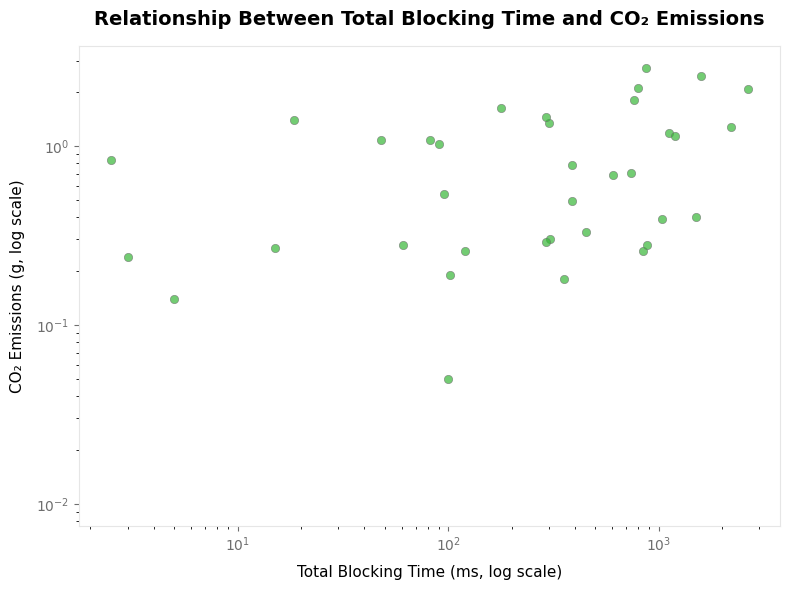

In [51]:
plt.figure(figsize=(8, 6), facecolor="white")

plt.scatter(
    df["tbt_ms"],
    df["co2_g"],
    alpha=0.7,
    color=green,
    edgecolors=gray,
    linewidth=0.5
)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Total Blocking Time (ms, log scale)", fontsize=11, labelpad=8)
plt.ylabel("CO₂ Emissions (g, log scale)", fontsize=11, labelpad=8)

plt.title(
    "Relationship Between Total Blocking Time and CO₂ Emissions",
    fontsize=14,
    pad=15,
    weight="semibold"
)

# Subtle spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(light_gray)

ax.tick_params(colors=gray)

plt.tight_layout()
plt.savefig("tbt_vs_co2.png", dpi=200)
plt.show()

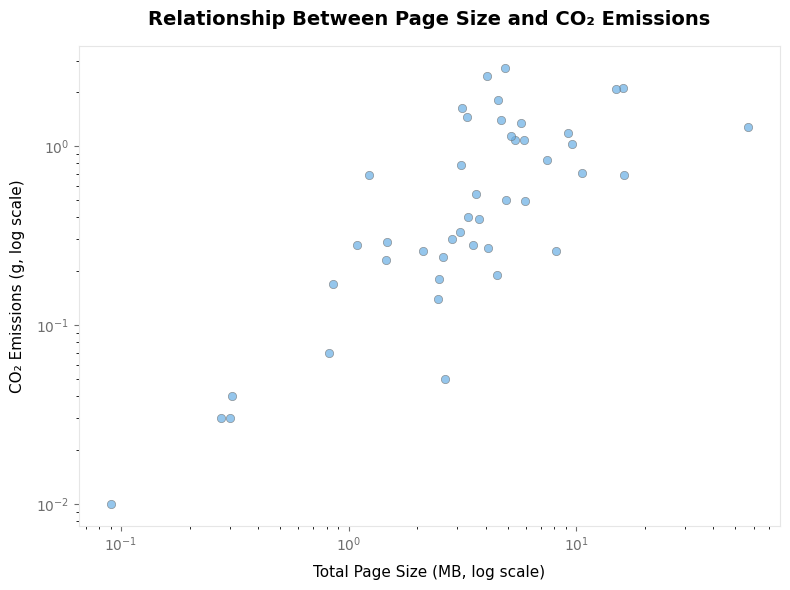

In [55]:
plt.figure(figsize=(8, 6), facecolor="white")

plt.scatter(
    df["total_mb"],
    df["co2_g"],
    alpha=0.7,
    color=blue,        # switch to blue since this is data/size focused
    edgecolors=gray,
    linewidth=0.5
)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Total Page Size (MB, log scale)", fontsize=11, labelpad=8)
plt.ylabel("CO₂ Emissions (g, log scale)", fontsize=11, labelpad=8)

plt.title(
    "Relationship Between Page Size and CO₂ Emissions",
    fontsize=14,
    pad=15,
    weight="semibold"
)

# Minimal, light spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(light_gray)

ax.tick_params(colors=gray)

plt.tight_layout()
plt.savefig("page_size_vs_co2.png", dpi=200)
plt.show()


In [20]:
tbt_med = np.median([val for val in df["tbt_ms"] if val != 0])
df["tbt_ms"] = df["tbt_ms"].apply(lambda x: tbt_med + 250*np.random.uniform(-1, 1) if x == 0 else x)

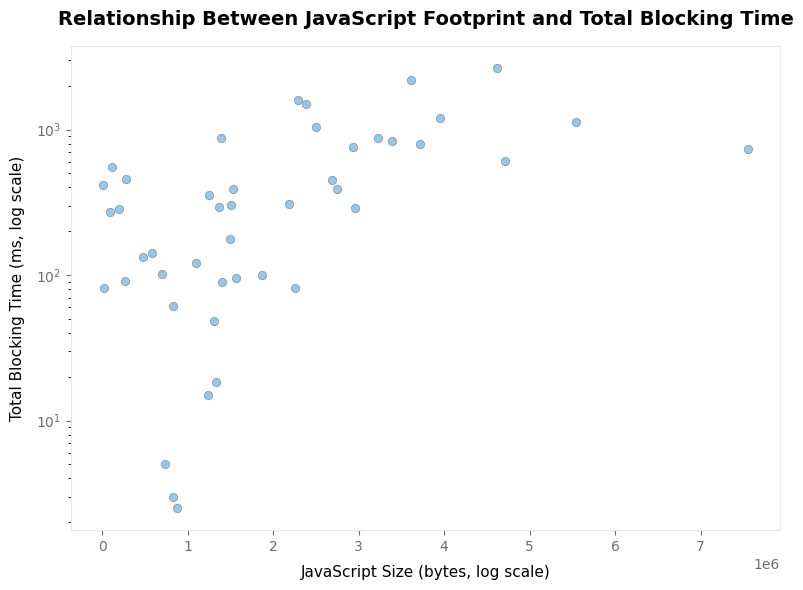

In [22]:
plt.figure(figsize=(8, 6), facecolor="white")

plt.scatter(
    df["js_bytes"],
    df["tbt_ms"],
    alpha=0.7,
    color=blue,
    edgecolors=gray,
    linewidth=0.5
)

# plt.xscale("log")
plt.yscale("log")

plt.xlabel("JavaScript Size (bytes, log scale)", fontsize=11, labelpad=8)
plt.ylabel("Total Blocking Time (ms, log scale)", fontsize=11, labelpad=8)

plt.title(
    "Relationship Between JavaScript Footprint and Total Blocking Time",
    fontsize=14,
    pad=15,
    weight="semibold"
)

# Subtle axis styling
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(light_gray)

ax.tick_params(colors=gray)

plt.tight_layout()
plt.savefig("js_bytes_vs_co2.png", dpi=200)
plt.show()

Originally used to support hypothesis that maybe Heavier JS ⇒ more main thread blocking ⇒ more energy use

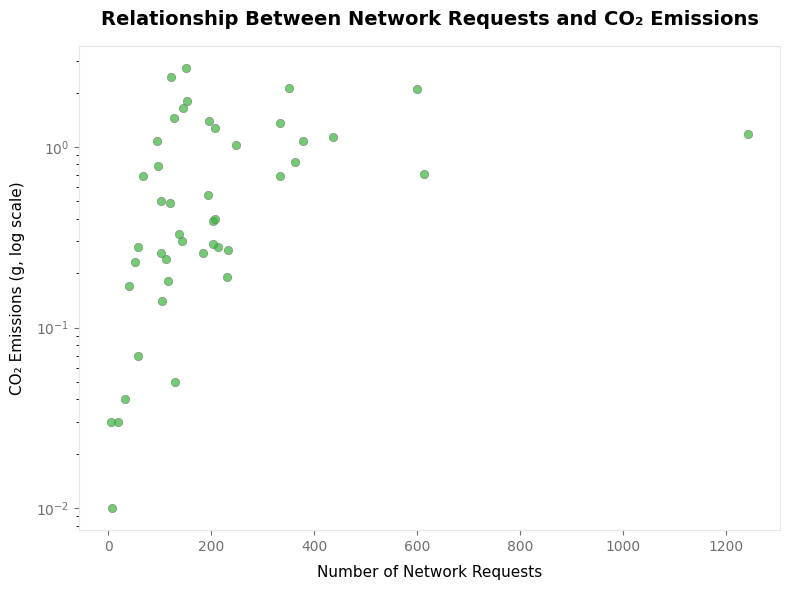

In [57]:
plt.figure(figsize=(8, 6), facecolor="white")

plt.scatter(
    df["requests"],
    df["co2_g"],
    alpha=0.7,
    color=green,
    edgecolors=gray,
    linewidth=0.5
)

plt.yscale("log")

plt.xlabel("Number of Network Requests", fontsize=11, labelpad=8)
plt.ylabel("CO₂ Emissions (g, log scale)", fontsize=11, labelpad=8)

plt.title(
    "Relationship Between Network Requests and CO₂ Emissions",
    fontsize=14,
    pad=15,
    weight="semibold"
)

# Subtle, light spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(light_gray)

ax.tick_params(colors=gray)

plt.tight_layout()
plt.savefig("requests_vs_co2.png", dpi=200)
plt.show()

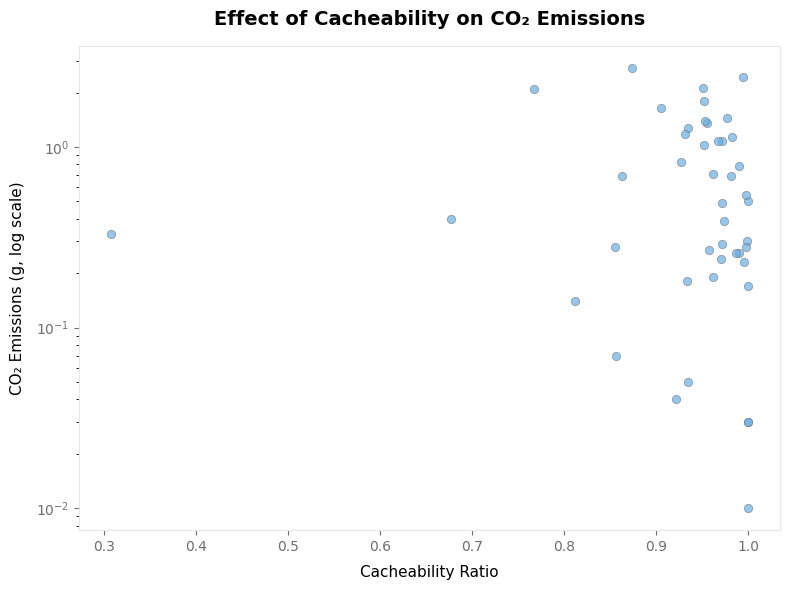

In [58]:
plt.figure(figsize=(8, 6), facecolor="white")

plt.scatter(
    df["cacheability_ratio"],
    df["co2_g"],
    alpha=0.7,
    color=blue,        # blue for efficiency/caching
    edgecolors=gray,
    linewidth=0.5
)

plt.yscale("log")

plt.xlabel("Cacheability Ratio", fontsize=11, labelpad=8)
plt.ylabel("CO₂ Emissions (g, log scale)", fontsize=11, labelpad=8)

plt.title(
    "Effect of Cacheability on CO₂ Emissions",
    fontsize=14,
    pad=15,
    weight="semibold"
)

# Subtle, light spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(light_gray)

ax.tick_params(colors=gray)

plt.tight_layout()
plt.savefig("cacheability_vs_co2.png", dpi=200)
plt.show()

Most sites already high-cache ⇒ weak variation in effect

C:\Users\srbol\AppData\Local\Temp\ipykernel_40440\2404676914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Figure size 800x600 with 0 Axes>

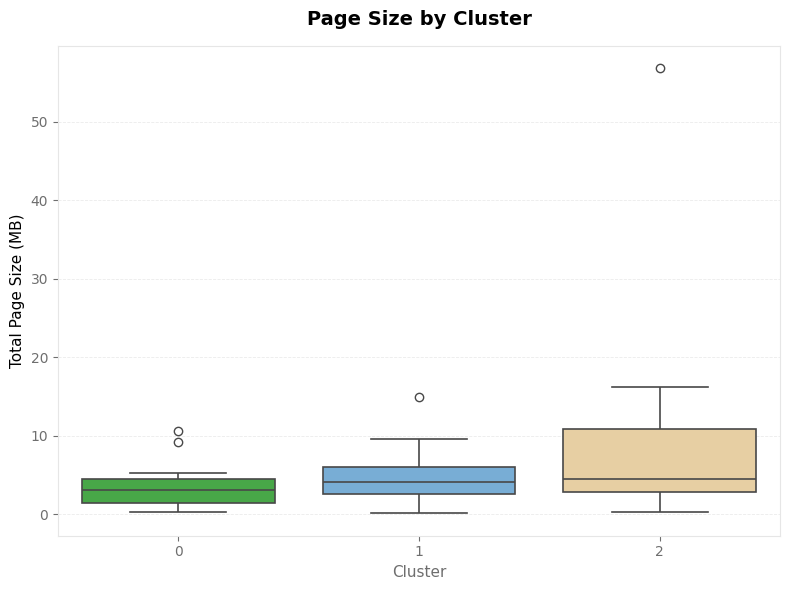

In [64]:
palette = [green, blue, yellow]
plt.figure(figsize=(8, 6), facecolor="white")

plt.figure(figsize=(8, 6), facecolor="white")

sns.boxplot(
    x="cluster",
    y="total_mb",
    data=df,
    palette=palette,
    linewidth=1.2
)

plt.ylabel("Total Page Size (MB)", fontsize=11)
plt.xlabel("Cluster", color=gray, fontsize=11)
plt.title("Page Size by Cluster", fontsize=14, weight="semibold", pad=15)

# Clean gridlines
plt.grid(axis="y", linestyle="--", linewidth=0.6, color=light_gray, alpha=0.8)

# Light spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(light_gray)
ax.tick_params(colors=gray)

plt.tight_layout()
plt.savefig("page_size_by_cluster.png", dpi=200)
plt.show()

Clusters mainly separated by size, not cacheability

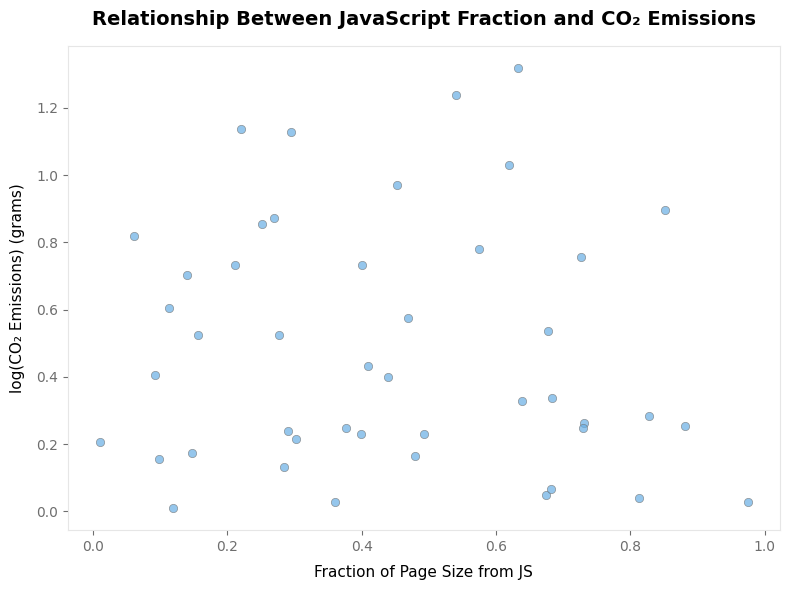

In [86]:
plt.figure(figsize=(8, 6), facecolor="white")

plt.scatter(
    df["js_frac"],
    df["log_co2"],
    alpha=0.7,
    color=blue,
    edgecolors=gray,
    linewidth=0.5
)

plt.xlabel("Fraction of Page Size from JS", fontsize=11, labelpad=8)
plt.ylabel("log(CO₂ Emissions) (grams)", fontsize=11, labelpad=8)

plt.title(
    "Relationship Between JavaScript Fraction and CO₂ Emissions",
    fontsize=14,
    pad=15,
    weight="semibold"
)

# Light spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(light_gray)
ax.tick_params(colors=gray)

plt.tight_layout()
plt.savefig("js_frac_vs_co2.png", dpi=200)
plt.show()

In [ ]:
corrs.drop("tbt_ms")[["cacheable_bytes", "js_bytes", "total_bytes", "third_party_bytes", "other_bytes", "co2_g"]]

total_bytes_y        0.779667
cacheable_bytes      0.737587
log_tbt              0.717455
js_bytes             0.655946
log_total_mb         0.614430
total_mb             0.597758
total_bytes          0.597758
third_party_bytes    0.569535
third_party_mb       0.569535
other_bytes          0.563209
Name: tbt_ms, dtype: float64

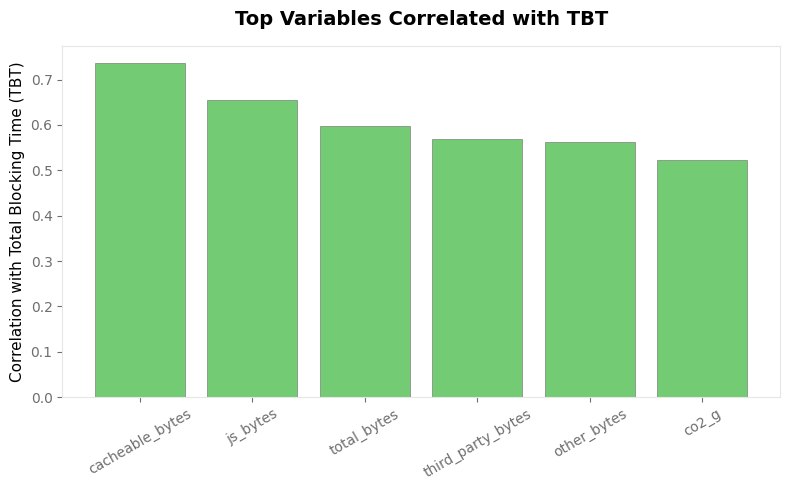

In [85]:
corrs = df.corr(numeric_only=True)["tbt_ms"].sort_values(ascending=False)

# Select top variables excluding 'tbt_ms' itself
top_vars = ["cacheable_bytes", "js_bytes", "total_bytes", "third_party_bytes", "other_bytes", "co2_g"]
top_corrs = corrs[top_vars]

plt.figure(figsize=(8, 5), facecolor="white")

bars = plt.bar(top_corrs.index, top_corrs.values, color=green, edgecolor=gray, linewidth=0.6, alpha=.7)

plt.ylabel("Correlation with Total Blocking Time (TBT)", fontsize=11)
plt.title("Top Variables Correlated with TBT", fontsize=14, weight="semibold", pad=15)

# Rotate x-axis labels for readability
plt.xticks(rotation=30, color="black")

# Light spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(light_gray)
ax.tick_params(colors=gray)

plt.tight_layout()
plt.savefig("tbt_correlated_vars.png", dpi=200)
plt.show()

TBT most associated with JS bytes, total size, requests, third-party content

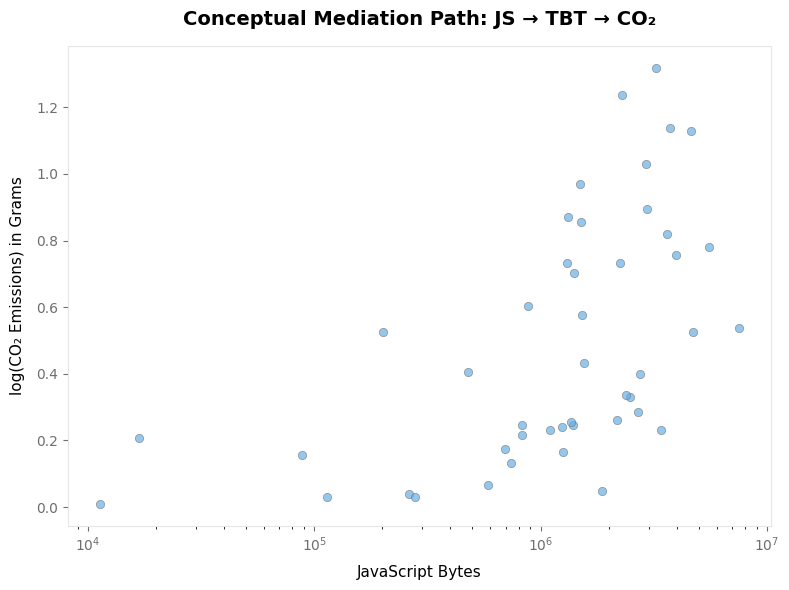

In [6]:
plt.figure(figsize=(8, 6), facecolor="white")

plt.scatter(
    df["js_bytes"],
    df["log_co2"],
    alpha=0.7,
    color=blue,
    edgecolors=gray,
    linewidth=0.5
)
plt.xscale("log")
plt.xlabel("JavaScript Bytes", fontsize=11, labelpad=8)
plt.ylabel("log(CO₂ Emissions) in Grams", fontsize=11, labelpad=8)

plt.title(
    "Conceptual Mediation Path: JS → TBT → CO₂",
    fontsize=14,
    pad=15,
    weight="semibold"
)

# Light spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(light_gray)
ax.tick_params(colors=gray)

plt.tight_layout()
# plt.savefig("js_bytes_vs_co2.png", dpi=200)
plt.show()


Main Model Coefficients

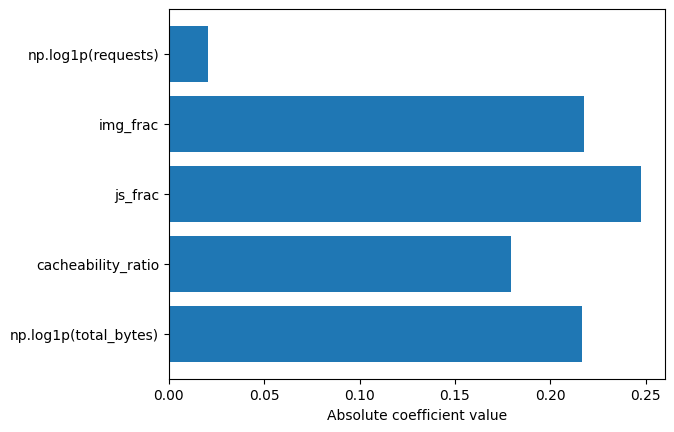

In [31]:
coefs = model_co2.params.drop("Intercept")
plt.figure()
plt.barh(coefs.index, np.abs(coefs.values))
plt.xlabel("Absolute coefficient value")
plt.show()


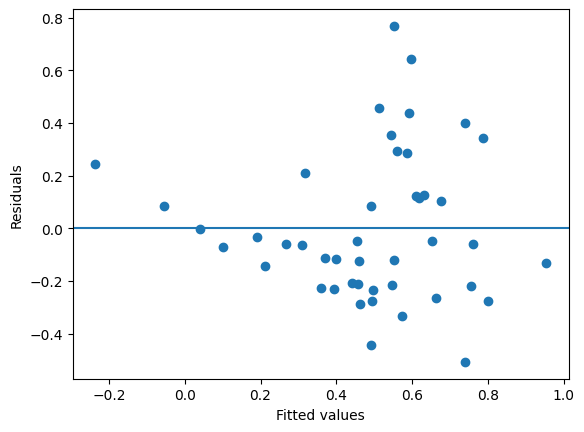

In [32]:
pred = model_co2.predict()
resid = model_co2.resid

plt.figure()
plt.scatter(pred, resid)
plt.axhline(0)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()


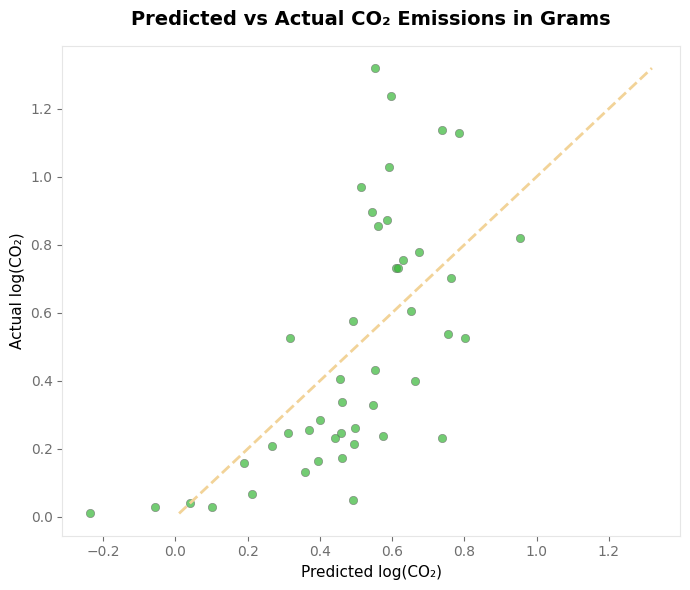

In [88]:
plt.figure(figsize=(7, 6), facecolor="white")

# Scatter points
plt.scatter(pred, df["log_co2"], alpha=0.7, color=green, edgecolors=gray, linewidth=0.5)

# 45-degree reference line
min_val = df["log_co2"].min()
max_val = df["log_co2"].max()
plt.plot([min_val, max_val], [min_val, max_val], color=yellow, linestyle="--", linewidth=2)

plt.xlabel("Predicted log(CO₂)", fontsize=11)
plt.ylabel("Actual log(CO₂)", fontsize=11)
plt.title("Predicted vs Actual CO₂ Emissions in Grams", fontsize=14, weight="semibold", pad=15)

# Light spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(light_gray)
ax.tick_params(colors=gray)

plt.tight_layout()
plt.savefig("pred_vs_actual_co2.png", dpi=200)
plt.show()

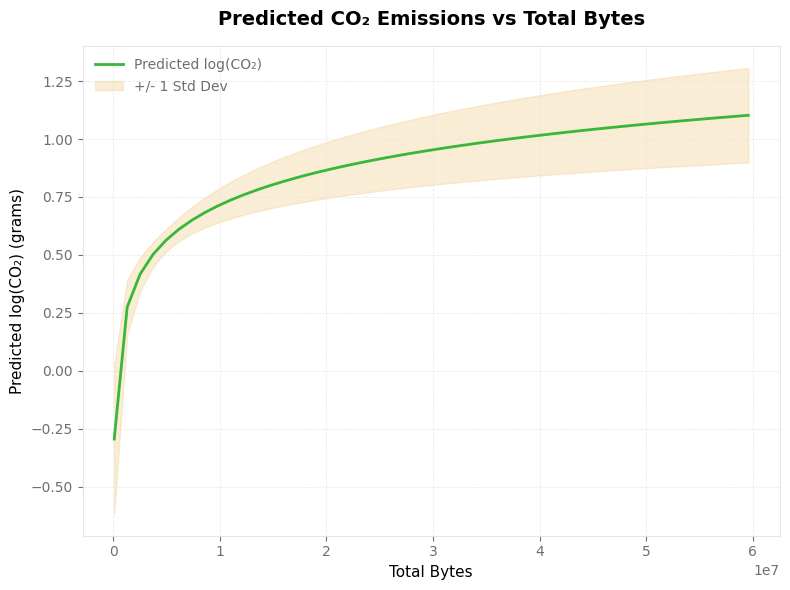

In [89]:
bytes_range = np.linspace(df["total_bytes"].min(), df["total_bytes"].max(), 50)

X_sim = pd.DataFrame({
    "total_bytes": bytes_range,
    "cacheability_ratio": df["cacheability_ratio"].mean(),
    "js_frac": df["js_frac"].mean(),
    "img_frac": df["img_frac"].mean(),
    "requests": df["requests"].mean()
})

pred_results = model_co2.get_prediction(X_sim)
y_pred = pred_results.predicted_mean
y_std = pred_results.se_mean
ci_lower, ci_upper = pred_results.conf_int().T

plt.figure(figsize=(8, 6), facecolor="white")

# Prediction line
plt.plot(bytes_range, y_pred, color=green, linewidth=2, label="Predicted log(CO₂)")

# Shaded +/- 1 standard deviation
plt.fill_between(
    bytes_range,
    y_pred - y_std,
    y_pred + y_std,
    color=yellow,
    alpha=0.4,
    label="+/- 1 Std Dev"
)

plt.xlabel("Total Bytes", fontsize=11)
plt.ylabel("Predicted log(CO₂) (grams)", fontsize=11)
plt.title("Predicted CO₂ Emissions vs Total Bytes", fontsize=14, weight="semibold", pad=15)

plt.grid(linestyle="--", linewidth=0.6, color=light_gray, alpha=0.8)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color(light_gray)
ax.tick_params(colors=gray)

plt.legend(frameon=False, fontsize=10, labelcolor=gray)
plt.tight_layout()
plt.savefig("pred_co2_from_bytes.png", dpi=200)
plt.show()
